In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

##Setting options for input data
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns', 50)

##Importing input data
cacao = pd.read_csv('~/Documents/Git/skillfactory/dataSource/PRJ2_EDA/cacao_flavors.csv')

display(cacao.head(10))
cacao.info()


,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [6]:
cacao.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [10]:
cacao.columns = ['bar_id', 'company', 'specific_orign', 'ref',
              'review_date', 'cocoa_percent', 'company_location', 
             'rating', 'bean_type', 'broad_origin']
cacao.columns

Index(['bar_id', 'company', 'specific_orign', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'],
      dtype='object')

1795


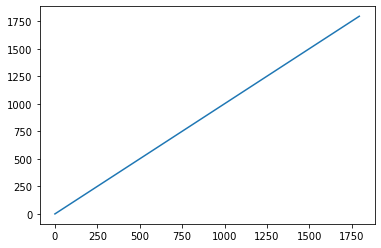

In [12]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

In [17]:
#cacao.drop(['bar_id'], inplace=True, axis=1)

In [16]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Bonnat,26
Fresco,26
Pralus,25
...,...
Heirloom Cacao Preservation (Millcreek),1
Heirloom Cacao Preservation (Mindo),1
Sibu Sura,1
Hachez,1


In [52]:
#display(cacao.head(3))
#cacao.insert(1, "company_2", cacao.company.apply(lambda x:None if x.strip()=='' else x), True)
#cacao.drop(['company_2'], inplace=True, axis=1)
#display(cacao.head(2))
#cacao.drop(['company_2'], inplace=True, axis=1)
cacao.company_2 = cacao.company.apply(lambda x:None if x.strip()=='' else x)
display((cacao.company_2.value_counts()>10).sum())



30

In [62]:
display(cacao.head(3))
#cacao.insert(3, "specific_orign_2", cacao.specific_orign.apply(lambda x:None if x.strip()=='' else x), True)
#cacao.drop(['company_2'], inplace=True, axis=1)
#display(cacao.head(2))
#cacao.drop(['company_2'], inplace=True, axis=1)
#cacao.company_2 = cacao.company.apply(lambda x:None if x.strip()=='' else x)
pd.DataFrame(cacao.specific_orign.value_counts())
display((cacao.specific_orign_2.value_counts()>10).sum())


,company,company_2,specific_orign,specific_orign_2,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,A. Morin,Agua Grande,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,A. Morin,Kpime,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,A. Morin,Atsane,Atsane,1676,2015,670%,France,3.00,,Togo


15

<AxesSubplot:>

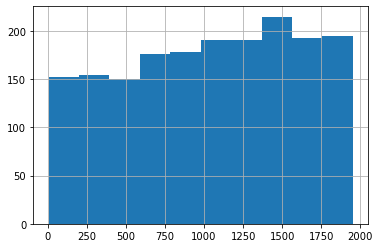

In [64]:
cacao.ref.hist()

In [66]:
cacao.ref.describe()

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

In [68]:
display(cacao.head(3))

,company,company_2,specific_orign,specific_orign_2,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,A. Morin,Agua Grande,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,A. Morin,Kpime,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,A. Morin,Atsane,Atsane,1676,2015,670%,France,3.00,,Togo


<AxesSubplot:>

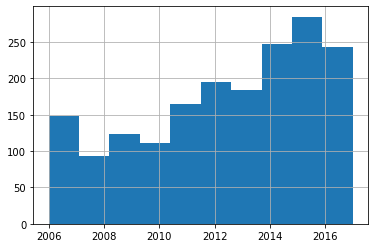

In [70]:
cacao.review_date.hist()

In [72]:
cacao.review_date.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

In [76]:
cacao.cocoa_percent


0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [78]:
display(cacao)

,company,company_2,specific_orign,specific_orign_2,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,A. Morin,Agua Grande,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,A. Morin,Kpime,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,A. Morin,Atsane,Atsane,1676,2015,670%,France,3.00,,Togo
3,A. Morin,A. Morin,Akata,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,A. Morin,Quilla,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...,...
1790,Zotter,Zotter,Peru,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Zotter,Congo,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Zotter,Kerala State,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Zotter,Kerala State,Kerala State,781,2011,62%,Austria,3.25,,India


In [89]:
cacao.drop(['cocoa_percent_2'], inplace=True, axis=1)
cacao.insert(7, 'cocoa_percent_2', cacao.cocoa_percent.apply(lambda x:float(x.replace('%',''))), True)

In [83]:
display(cacao)

,company,company_2,specific_orign,specific_orign_2,ref,review_date,cocoa_percent,cocoa_percent_2,cocoa_percent_2,company_location,rating,bean_type,broad_origin
0,A. Morin,A. Morin,Agua Grande,Agua Grande,1876,2016,63%,63.0,63.0,France,11.50,,Sao Tome
1,A. Morin,A. Morin,Kpime,Kpime,1676,2015,70%,70.0,70.0,France,2.75,,Togo
2,A. Morin,A. Morin,Atsane,Atsane,1676,2015,670%,670.0,670.0,France,3.00,,Togo
3,A. Morin,A. Morin,Akata,Akata,1680,2015,70%,70.0,70.0,France,3.50,,Togo
4,A. Morin,A. Morin,Quilla,Quilla,1704,2015,70%,70.0,70.0,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,Zotter,Zotter,Peru,Peru,647,2011,70%,70.0,70.0,Austria,3.75,,Peru
1791,Zotter,Zotter,Congo,Congo,749,2011,65%,65.0,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Zotter,Kerala State,Kerala State,749,2011,65%,65.0,65.0,Austria,3.50,Forastero,India
1793,Zotter,Zotter,Kerala State,Kerala State,781,2011,62%,62.0,62.0,Austria,3.25,,India


0        63.0
1        70.0
2       670.0
3        70.0
4        70.0
        ...  
1790     70.0
1791     65.0
1792     65.0
1793     62.0
1794     65.0
Name: cocoa_percent_2, Length: 1795, dtype: float64

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent_2, dtype: float64

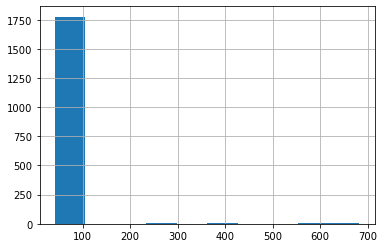

In [91]:
display(cacao.cocoa_percent_2)
cacao.cocoa_percent_2.hist()
cacao.cocoa_percent_2.describe()

25th percentile:70.0, 75th pecentile:75.0 IQR:5.0 Outlier margins: [62.5,82.5]


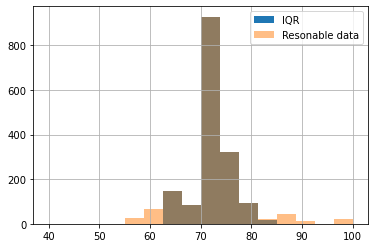

In [97]:
# Calculating IQR for cocoa_percent_2.  
iqr = cacao.cocoa_percent_2.quantile(0.75)-cacao.cocoa_percent_2.quantile(0.25)
perc25 = cacao.cocoa_percent_2.quantile(0.25)
perc75 = cacao.cocoa_percent_2.quantile(0.75)

print('25th percentile:{},'.format(perc25),
     '75th pecentile:{}'.format(perc75),
     'IQR:{}'.format(iqr),
     "Outlier margins: [{a},{b}]".format(a=perc25-1.5*iqr, b=perc75+1.5*iqr))

cacao.cocoa_percent_2.loc[cacao.cocoa_percent_2.between(
    perc25-1.5*iqr,
    perc75+1.5*iqr)].hist(bins=16, range=(40,100), label='IQR')

cacao.cocoa_percent_2.loc[cacao.cocoa_percent_2<=100].hist(
    alpha=0.5, bins=16, range=(40, 100), label='Resonable data')

plt.legend()


In [100]:
cacao.company_location

0        France
1        France
2        France
3        France
4        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1795, dtype: object

In [103]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print('Values, counted more than 10 times:',
     (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,764
France,156
Canada,125
U.K.,96
Italy,63
...,...
Suriname,1
Niacragua,1
India,1
Philippines,1


Values, counted more than 10 times: 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1795 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


count    1795.000000
mean        3.422981
std         1.750584
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

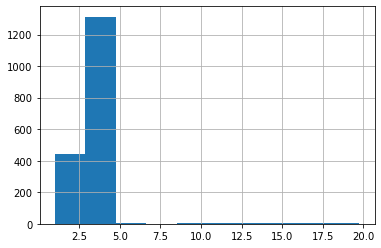

In [105]:
cacao.rating.hist()
cacao.rating.describe()

25th percentile:3.0, 75th pecentile:3.5 IQR:0.5 Outlier margins: [2.25,4.25]


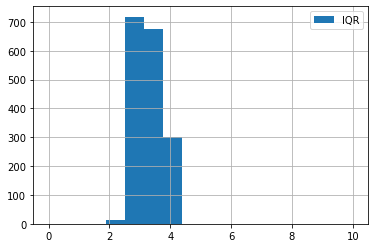

In [111]:
# Searching IQR for cacao.rating.  

iqr = cacao.rating.quantile(0.75)-cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)

print('25th percentile:{},'.format(perc25),
     '75th pecentile:{}'.format(perc75),
     'IQR:{}'.format(iqr),
     "Outlier margins: [{a},{b}]".format(a=perc25-1.5*iqr, b=perc75+1.5*iqr))

cacao.rating.loc[cacao.rating.between(
    perc25-1.5*iqr,
    perc75+1.5*iqr)].hist(bins=16, range=(0,10), label='IQR')


plt.legend()

In [113]:
# Filtering all dataset to ensure only valid (no outliers!!) rating is in.  
cacao = cacao.loc[cacao.rating.between(perc25-1.5*iqr, perc75+1.5*iqr)]

In [121]:
cacao.bean_type.describe()
display(cacao.bean_type)

cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip()=='' else x)
cacao.bean_type = cacao.bean_type.loc[cacao.bean_type!='None']

1            None
2            None
3            None
4            None
5         Criollo
          ...    
1790         None
1791    Forastero
1792    Forastero
1793         None
1794         None
Name: bean_type, Length: 1708, dtype: object

In [123]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print('Unique values > 10:', (cacao.bean_type.value_counts()>10).sum())
print('Unique values:', cacao.bean_type.nunique())
cacao.loc[:,['bean_type']].info()

,bean_type
Trinitario,405
Criollo,149
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",38
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Unique values > 10: 7
Unique values: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  868 non-null    object
dtypes: object(1)
memory usage: 26.7+ KB


In [126]:
display(cacao.head(3))

,company,company_2,specific_orign,specific_orign_2,ref,review_date,cocoa_percent,cocoa_percent_2,company_location,rating,bean_type,broad_origin
1,A. Morin,A. Morin,Kpime,Kpime,1676,2015,70%,70.0,France,2.75,NaN,Togo
2,A. Morin,A. Morin,Atsane,Atsane,1676,2015,670%,670.0,France,3.00,NaN,Togo
3,A. Morin,A. Morin,Akata,Akata,1680,2015,70%,70.0,France,3.50,NaN,Togo


In [134]:
cacao.broad_origin.describe()
cacao.broad_origin = cacao.broad_origin.astype(str).apply(lambda x: None if x.strip()=='' else x)
cacao.broad_origin = cacao.broad_origin.loc[cacao.broad_origin!='None']
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Unique values > 10:', (cacao.broad_origin.value_counts()>10).sum())
print('Unique values:', cacao.broad_origin.nunique())
cacao.loc[:,['broad_origin']].info()

,broad_origin
Venezuela,204
Ecuador,180
Peru,159
Madagascar,142
Dominican Republic,135
...,...
Carribean(DR/Jam/Tri),1
"Ven.,Ecu.,Peru,Nic.",1
Cameroon,1
"Africa, Carribean, C. Am.",1


Unique values > 10: 26
Unique values: 97
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1708 non-null   object
dtypes: object(1)
memory usage: 26.7+ KB


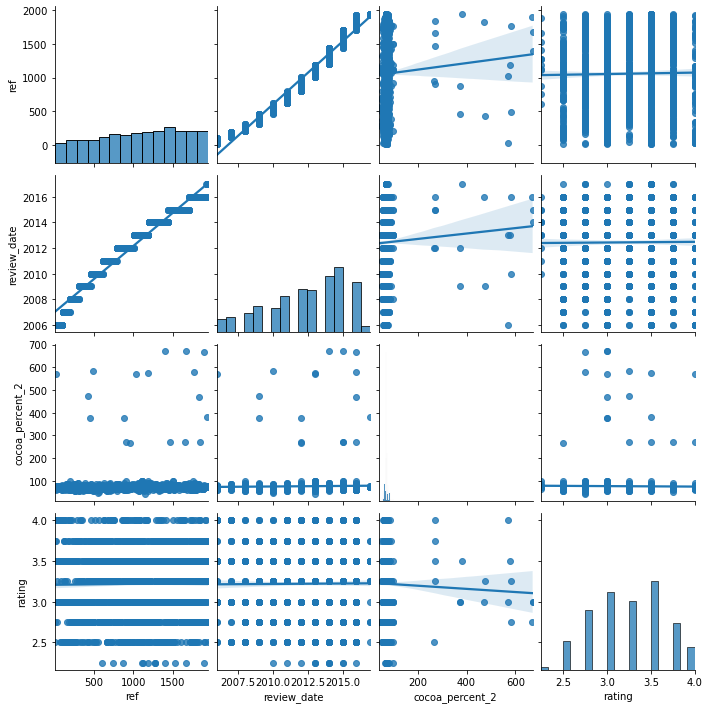

In [139]:
sns.pairplot(cacao, kind='reg')

In [140]:
cacao.corr()

,ref,review_date,cocoa_percent_2,rating
ref,1.000000,0.984927,0.038464,0.016306
review_date,0.984927,1.000000,0.031937,0.007524
cocoa_percent_2,0.038464,0.031937,1.000000,-0.020138
rating,0.016306,0.007524,-0.020138,1.000000


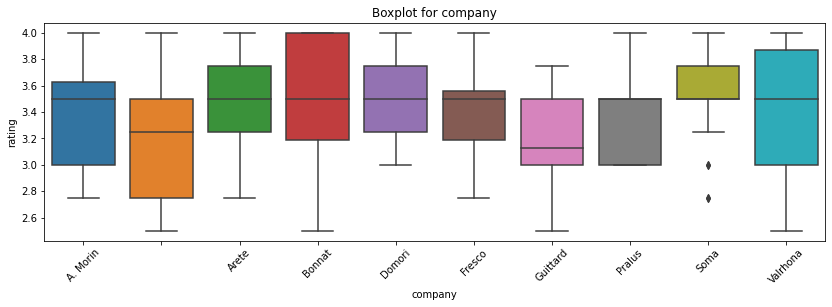

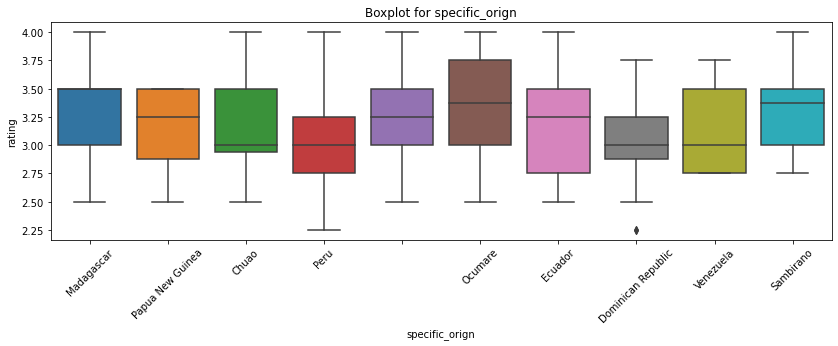

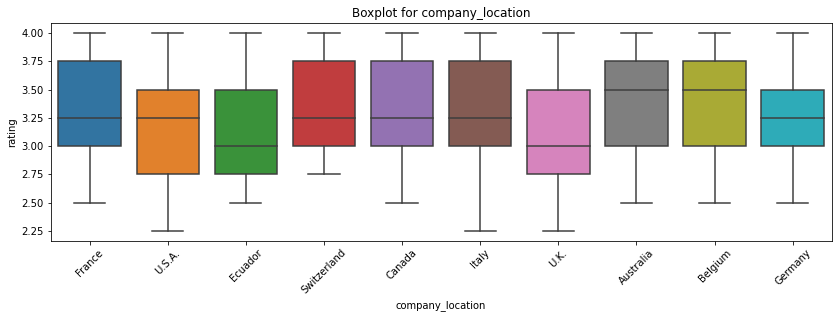

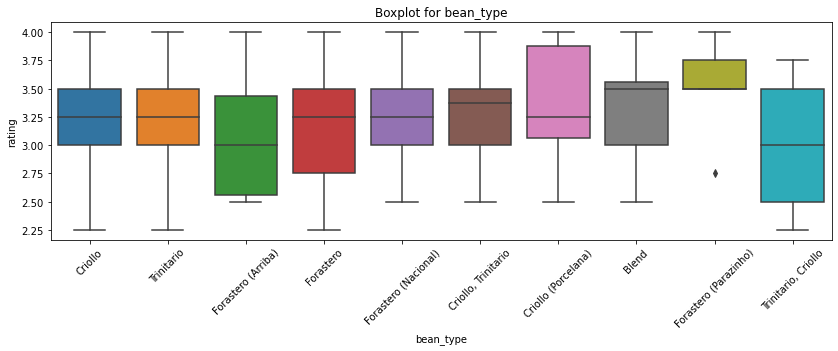

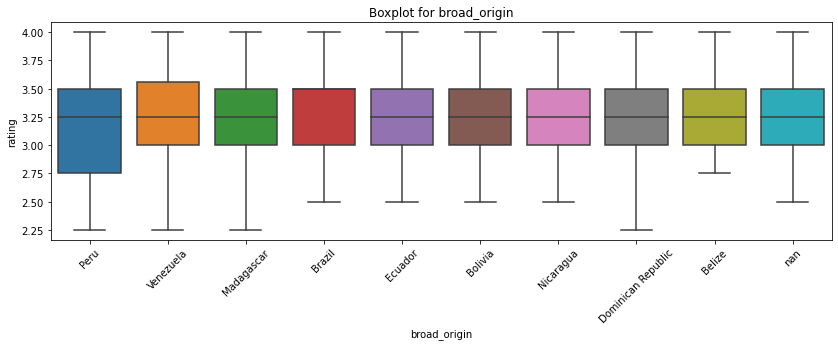

In [144]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='rating',
               data=cacao.loc[cacao.loc[:,column].isin(cacao.loc[:,column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for '+column)
    plt.show()
    
for col in ['company','specific_orign','company_location','bean_type','broad_origin']:
    get_boxplot(col)

In [150]:
def get_stat_diff(column):
    cols = cacao.loc[:,column].value_counts().index[:10]
    combinations_all = list(combinations(cols,2))
    #display(combinations_all)
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'],
                    cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue <= 0.05/len(combinations_all):
            print('Found statisticaly important diffs for column', column)
            break
            
for col in ['company','specific_orign','company_location','bean_type','broad_origin']:
    get_stat_diff(col)

Found statisticaly important diffs for column company
Found statisticaly important diffs for column specific_orign
Found statisticaly important diffs for column company_location
Found statisticaly important diffs for column bean_type
